# Preliminaries

This notebook provides some notation and a review of basic math facts that we'll be using throughout the course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A helper function for plotting functions
def plot(func, xlim=(-3,3), *args):
    x = np.linspace(*xlim, 250)
    fig, ax = plt.subplots(figsize=(8,6))
    plt.plot(x, func(x), *args)
    plt.grid(ls=':')

## Asset returns

Let $P_t$ be the price of an asset at time $t$. We'll define the *gross return* on the asset over one period as

$$1+R_t = \frac{P_t + D_t}{P_{t-1}},$$

where $D_t$ denotes the value of any dividends paid during the period. For now, we'll assume that $D_t=0$.

The *net return* is simply

$$R_t = \frac{P_t}{P_{t-1}} - 1 = \frac{P_t - P_{t-1}}{P_{t-1}}.$$

Holding the asset for $k$ periods would earn a gross return of

\begin{align*}
1+R_t[k] = \frac{P_t}{P_{t-k}} &= \frac{P_t}{P_{t-1}} \times \frac{P_{t-1}}{P_{t-2}} \times \cdots \times \frac{P_{t-k+1}}{P_{t-k}} \\
&= (1+R_t)(1+R_{t-1})\cdots(1+R_{t-k+1}) \\
&= \prod_{j=0}^{k-1}(1+R_{t-j}).
\end{align*}

That is, the $k$-period return is simply the product of the $k$ one-period returns; for this reason it is also called the *compound return*.

Assets may generate a return that is compounded over varying intervals. For example, an asset generating a return per year of $R$ but compouning $n$ times per year will have a total return of

$$\left(1+\frac{R}{n}\right)^n.$$

In [4]:
R = 0.1   # assume return of 10% per year

for n in [1, 2, 4, 12, 52, 365, 24*365]:
    print('{}\t{:.5f}'.format(n, (1+R/n)**n))

1	1.10000
2	1.10250
4	1.10381
12	1.10471
52	1.10506
365	1.10516
8760	1.10517


In the limit $n\to\infty$ this leads to a *continuous compounding*. With continuous compounding, the asset value after one year is

$$e^{0.1} \approx 1.10517,$$

where

$$e^x=\lim _{n\to \infty }\left(1+{\frac {x}{n}}\right)^{n}$$

is the exponential function.

In [5]:
np.exp(R)

1.1051709180756477

The number $e$ has a fascinating history, recounted in the excellent book [e: The Story of a Number](https://www.google.com/books/edition/E/BdKoQgAACAAJ?hl=en) by Eli Maor.

We can see in the plot below that $e$ is just above 2.7.

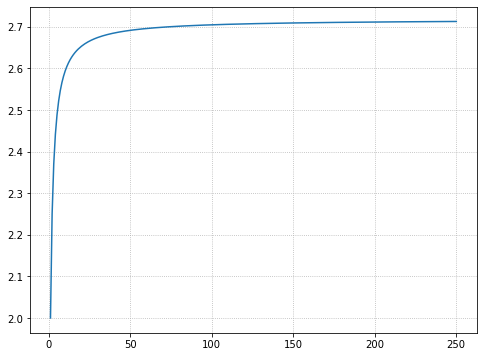

In [6]:
plot(lambda n: (1+1/n)**n, (1,250))

In [7]:
from numpy import exp, log

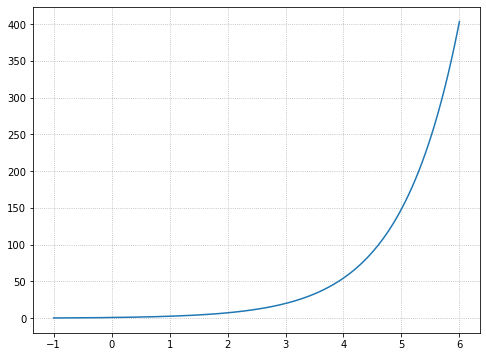

In [8]:
plot(exp, xlim=(-1,6))

**Fun fact.** If you want to impress your friends at parties, tell them [that](https://twitter.com/phalpern/status/1238889392162439169)

$$e^{\pi i} + 1 = 0.$$

If you *really* want to impress them, [prove it](https://en.wikipedia.org/wiki/Euler%27s_formula)!

In [9]:
i = 0+1j
exp(np.pi*i) + 1

1.2246467991473532e-16j

The inverse of the exponential function is the natural logarithm. Economists just call this “log” — there is never a need to distinguish this from the logarithm in any other base.

In [10]:
log(10)

2.302585092994046

In [11]:
exp(log(10))

10.000000000000002

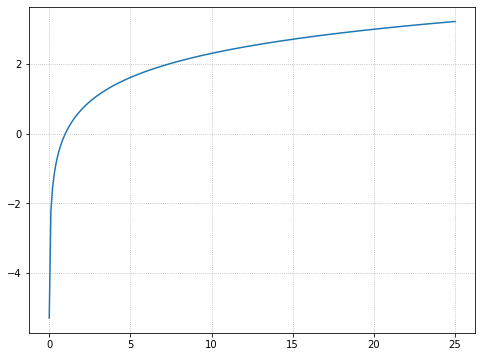

In [12]:
plot(log, (0.005,25))

Logarithms have the property that

$$\ln(xy) = \ln(x) + \ln(y).$$

### Log returns

The *log return*, or *continuously compounded return* is

$$r_t = \ln(1+R_t) = \ln\left(\frac{P_t}{P_{t-1}}\right) = \Delta \ln(P_t),$$

where $\Delta x_t := x_t - x_{t-1}$ is the *difference operator*.

The multiperiod log return is

\begin{align*}
r_t[k] &= \ln(1+R_t[k]) = \ln[(1+R_t)(1+R_{t-1}\cdots(1+R_{t-k+1}) \\
&= \ln(1+R_t) + \ln(1+R_{t-1}) + \cdots + \ln(1+R_{t-k+1}) \\
&= r_t + r_{t-1} + \cdots + r_{t-k+1}.
\end{align*}

That is, when compounding continuously compounded returns, we simply sum the continuously compounded one-period returns.

## Factorial

The factorial of a positive integer $n$ is the product of all integers between 0 and $n$:

$${\displaystyle n!=n\cdot (n-1)\cdot (n-2)\cdot (n-3)\cdot \cdots \cdot 3\cdot 2\cdot 1\,.}$$

In [13]:
from scipy.special import factorial

In [14]:
factorial(5)

120.0

In [15]:
np.product(range(1,6))

120

## Taylor series

The Taylor series approximation of a function, $f(x)$, around some point $a$ is

$$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^{2} + \frac{f''(a)}{3!}(x-a)^{3} + \cdots$$

As we add more terms to the expansion, we will get arbitrarily close to the true function $f(x)$ (as long as we stay near $a$).

For example, take $f(x) = \ln(1+x)$, and take the expansion around $a=0$,

\begin{align*}
\ln(1+x) &= \ln(1+a) + (1+a)^{-1}(x-a) - \frac{(1+a)^{-2}(x-a)^2}{2} + \frac{2(1+a)^{-3}(x-a)^3}{6} \cdots \\
&= x - \frac{1}{2}x^2 + \frac{1}{3}x^3 - \frac{1}{4}x^4 + \cdots \\
&= \sum_{k=1}^{\infty} \frac{(-1)^{k-1} x^k}{k}.
\end{align*}

If we keep only the first term of the expansion, we get a very useful fact about the logarithm function, namely that, when $x$ is close to zero,

$$\ln(1+x) \approx x.$$

In [16]:
print('x\tlog(1+x)')
print('-'*16)
for x in np.logspace(-3,0.5,6):
    print('{:.4f}\t{:.4f}'.format(x, np.log(1+x)))

x	log(1+x)
----------------
0.0010	0.0010
0.0050	0.0050
0.0251	0.0248
0.1259	0.1186
0.6310	0.4892
3.1623	1.4261


Including higher-order terms improves the approximation, as shown here:

In [17]:
def plot_taylor_ln1px(n):
    '''Plot the Taylor series expansion of ln(1+x) near 0'''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-4,2)
    # Set up the spines
    for loc in ['right', 'top']:
        ax.spines[loc].set_color('none')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_position(('data',0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    x = np.arange(-1.5, 1.5, 0.001)
    
    # Draw f(x) over x > -1
    fx = np.log(x[x>-1]+1)
    ax.plot(x[x>-1], fx, '-', color='r', lw=3)

    # Draw the Taylor approximation
    approx = 0
    for k in range(1,n+1):
        approx += (-1)**(k-1) * (1/k) * x**k
        
    ax.plot(x, approx, 'k--', lw=3)
    ax.text(-1, 1, f'N={n}', fontsize=18)

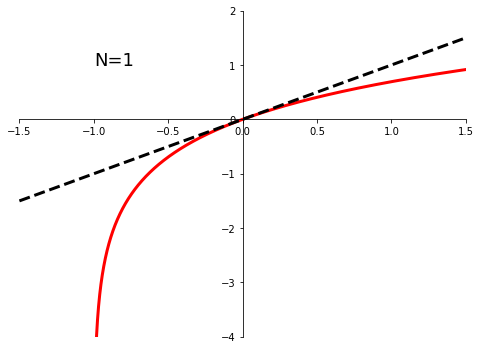

In [18]:
plot_taylor_ln1px(1)

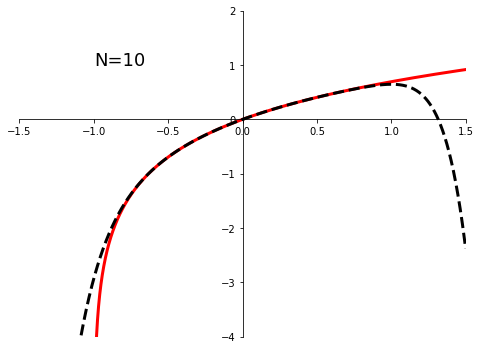

In [19]:
plot_taylor_ln1px(10)

This implies that for small returns, the simple net return $R_t$ and the log return $r_t$ will be very close.

## Combinations

Given a set of $n$ elements a combination is a choice of $k$ items without regard to the ordering. There are $_nC_k$ (“*n*-choose-*k*”) ways to select such a combination, where

$$_nC_k = \binom{n}{k} = \frac{n!}{k!(n-k)!}.$$

$_nC_k$ is also referred to as the *binomial coefficient*.

In [20]:
from scipy.special import comb

comb(4,2)

6.0

In [21]:
# How many ways to choose k items from a set with cardinality 6

n = 6

[comb(n,k) for k in range(n+1)]

[1.0, 6.0, 15.0, 20.0, 15.0, 6.0, 1.0]

The *power set* contains all subsets of a set. For example, with $n=6$ the power set is

$$\{\varnothing, 1, 2, \ldots, \{1, 2\}, \ldots \{1,2,3\}, \ldots, \{1,2,3,4,5,6\}\}.$$

The cardinality of the power set is $2^n$.

In [22]:
# cardinality of the power set
sum([comb(n,k) for k in range(n+1)])

64.0

# Calculus

## The fundamental theorems of calculus

Let $f$ be a continuous function defined on the closed interval $[a,b]$. Let $F$ be the function defined as

$$F(x) = \int_a^x f(u)du.$$

Then $F$ is differentiable on the open interval $(a,b)$ and $$F'(x) = f(x)$$ for all $x$ in $(a,b)$.

If $f$ is continuous on the closed interval $[a,b]$ and $F$ is its integral then

$$\int_a^b f(x)dx = F(b) - F(a).$$

## Linearity of integrals

The integral of a linear combination is the linear combination of the integrals,

$$\int _{a}^{b}(\alpha f+\beta g)(x)\,dx=\alpha \int _{a}^{b}f(x)\,dx+\beta \int _{a}^{b}g(x)\,dx.$$

## Differential equations

A differential equation expresses a relation between a function and its derivative. For example, suppose a bank pays an interest rate of $r$ per year. In a period of time $\Delta t$ the change in the account value is therefore

$$\Delta B(t) = B(t) \times r\,\Delta t.$$

In the continuous time limit, this implies the differential equation

$$\frac{dB(t)}{B(t)} = r\,dt$$

where $r$ is the constant interest rate.

This equation can be solved by integrating both sides and simplifying:

$$\int \frac{1}{B(t)} dB(t) = \int r\,dt$$
$$\Longrightarrow \ln(B(t)) = rt + c$$
$$\Longrightarrow B(t) = e^{rt+c} = e^{rt} \cdot e^c$$

At $t=0$ this gives $B(0) = e^0\cdot e^c = e^c$, which pins down the value of the constant. The value of the account is therefore

$$B(t) = B(0)\cdot e^{rt},$$

which is of course the value calculated with continous compounding.

## Gaussian integral

The Gaussian integral (named for [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss)) is

$$\int _{-\infty }^{\infty }e^{-z^2}\,dz={\sqrt {\pi }}.$$

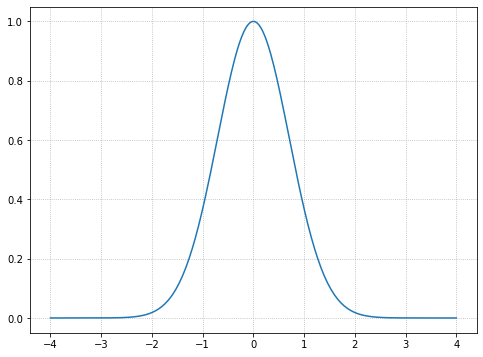

In [23]:
plot(lambda z: np.exp(-z**2), xlim=(-4,4))

For a more general form, let

$${\displaystyle z = \frac{x-b}{\sqrt{2c^2}} \Longrightarrow dz = \frac{dx}{\sqrt{2c^2}}}.$$

Then

\begin{equation*}
{\large\int_{-\infty }^{\infty }}\exp\left\{-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right\}dx = {\sqrt{2\pi c^2 }}
\end{equation*}

## The gamma function

The gamma function is a generalization of the factorial, and is given by

$$\Gamma(x)=\int _{0}^{\infty }s^{x-1}e^{-s}ds, \quad x>0.$$

For any positive integer $n$, $$\Gamma(n) = n\Gamma(n) = (n-1)!$$

The gamma function is effectivly a continuous function that connects the dots of the factorial function, as shown below.

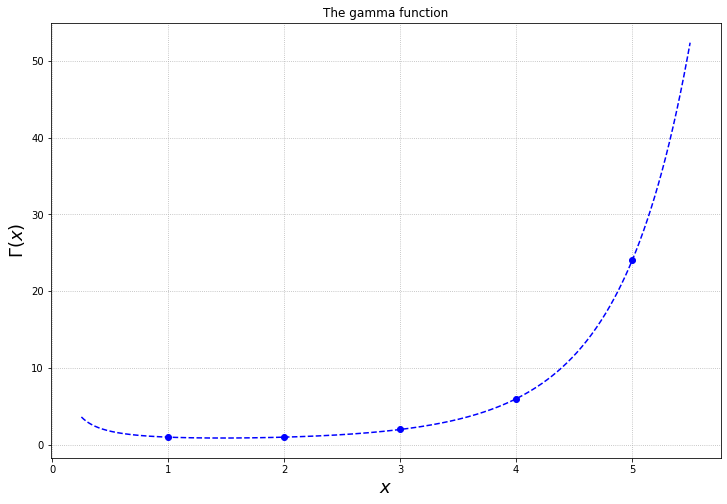

In [24]:
from scipy.special import gamma

plt.figure(figsize=(12,8))

z = np.linspace(0.25,5.5,500)
plt.plot(z, gamma(z), 'b--')

n = np.arange(6)
plt.plot(n, gamma(n), 'bo')

plt.title(r'The gamma function')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$\Gamma(x)$', fontsize=18)

plt.grid(ls=':')
plt.show()

In [ ]:
np.alltrue(factorial(np.arange(15)) == gamma(1+np.arange(15)))

Note that $\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}$, which can be seen by writing the Gaussian integral as

$$\sqrt{\pi} = \int _{-\infty }^{\infty }e^{-x^{2}}dx=2\int _{0}^{\infty }e^{-x^{2}}dx.$$

Here, the second equality follows from the fact that the Gaussian integral is an *even* function, meaning it is symmetric about zero (that is, $f(x)=f(-x)$). After the change of variable $x=\sqrt{t}$,

$$2\int _{0}^{\infty}e^{-x^2}dx = 2\int_{0}^{\infty}\frac{1}{2}\ e^{-t}\ t^{-\frac{1}{2}}dt = \Gamma \left({\frac {1}{2}}\right).$$

# Linear algebra

## Vectors

In [25]:
def plot_vectors(vecs, lims):
    '''A function for plotting vectors'''
    from matplotlib import cm
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(xlim=lims, ylim=lims)
    ax.grid(ls=':')

    # draw vectors
    colors = cm.rainbow(np.linspace(0,1,len(vecs)))
    
    for v,c in zip(vecs,colors):
        v = v.flatten()
        ax.arrow(0, 0, *v,
                 head_width=0.15, head_length=0.15,
                 length_includes_head=True,
                 fc=c, ec=c,
                 label='({:.2f}, {:.2f})'.format(*v))
    plt.legend()
    plt.show()

In [26]:
a = np.array([4,2])
b = np.array([-2,1])
c = np.array([-1,-2])

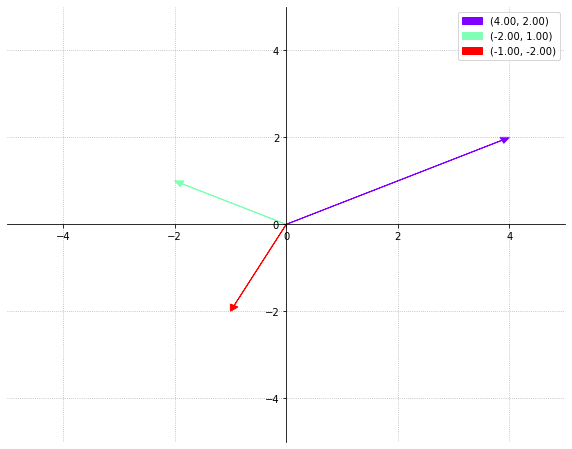

In [27]:
plot_vectors([a,b,c], (-5,5))

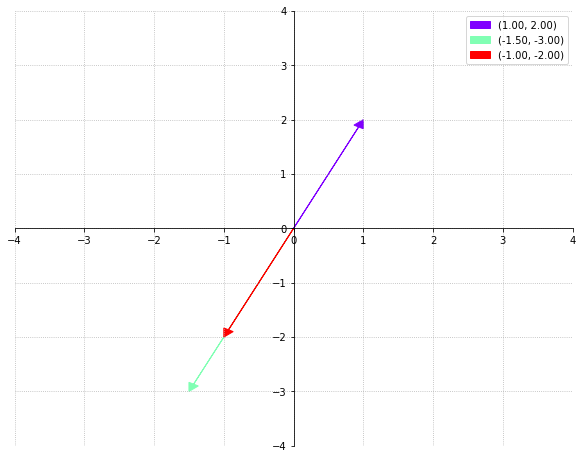

In [28]:
plot_vectors([-1*c, 1.5*c, c], (-4,4))

The length of a vector is given by the “Euclidean” or $\ell^2$ norm

$${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2} := \sqrt{\mathbf{x}\cdot\mathbf{x}} = \sqrt{x_{1}^{2}+\cdots +x_{n}^{2}}}.$$

The expression under the square root is the *dot product*, $\mathbf{x}\cdot \mathbf{x}=\mathbf{x}'\mathbf{x}$, where

$$\mathbf{a}\cdot \mathbf{b} := \sum_{i=1}^n a_i b_i = a_1b_1 + \ldots + a_nb_n.$$

Other measures of distance, or [norms](https://en.wikipedia.org/wiki/Norm_(mathematics)), are possible. The $\ell^1$ norm, given by

$$\left\|{\boldsymbol {x}}\right\|_{1}:=\sum _{i=1}^{n}\left|x_{i}\right|,$$

is also called the “Taxicab” or “Manhattan” norm — can you see why?

In [29]:
a

array([4, 2])

In [30]:
a.dot(a)

20

In [31]:
np.dot(a,a)

20

In [32]:
a @ a

20

In [33]:
# length
np.sqrt(a.dot(a))

4.47213595499958

In [34]:
from numpy.linalg import norm
norm(a)

4.47213595499958

The angle $\theta$ between two vectors follows

$$\cos(\theta) = \frac{a\cdot b}{||a||\cdot||b||},$$

so

$$\theta = \arccos\left(\frac{a\cdot b}{||a||\cdot||b||}\right).$$


Two vectors are *orthogonal* if the angle between them is 90° or $\frac{\pi}{2}$ radians. Since $\cos(\pi/2)=0$, vectors are orthogonal if and only if their dot product is zero.

In [35]:
# angle between a and b
np.arccos( a.dot(b) / norm(a) / norm(b))

2.214297435588181

In [36]:
# convert to degrees
np.degrees(2.214297435588181)

126.86989764584402

In [37]:
# angle between b and c
np.arccos( b.dot(c) / norm(b) / norm(c))

1.5707963267948966

In [38]:
np.pi / 2

1.5707963267948966

In [39]:
b @ c

0

## Matrices

If $\mathbf{A}$ is an $m\times n$ matrix and $\mathbf{B}$ is an $n\times p$ matrix,

${\displaystyle \mathbf {A} ={\begin{pmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\\\end{pmatrix}},\quad \mathbf {B} ={\begin{pmatrix}b_{11}&b_{12}&\cdots &b_{1p}\\b_{21}&b_{22}&\cdots &b_{2p}\\\vdots &\vdots &\ddots &\vdots \\b_{n1}&b_{n2}&\cdots &b_{np}\\\end{pmatrix}}}$

the matrix product $\mathbf{C} = \mathbf{AB}$ is defined to be the $m \times p$ matrix

$${\displaystyle \mathbf {C} ={\begin{pmatrix}c_{11}&c_{12}&\cdots &c_{1p}\\c_{21}&c_{22}&\cdots &c_{2p}\\\vdots &\vdots &\ddots &\vdots \\c_{m1}&c_{m2}&\cdots &c_{mp}\\\end{pmatrix}}}$$

such that ${\displaystyle c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots +a_{in}b_{nj}=\sum _{k=1}^{n}a_{ik}b_{kj},}$ for $i=1,\ldots,m$ and $j=1,\ldots,p.$

Obviously, such multiplication is only possible when the number of columns of $\mathbf{A}$ equals the number of rows of $\mathbf{B}$.

This diagram provides an illustration of the mechanics of matrix multiplication.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/MatrixMultiplication.png" width=500>

[[Source](https://commons.wikimedia.org/wiki/File:MatrixMultiplication.png)]

When working with matrices and vectors, it is useful to distinguish between a $1\times n$ *row vector*

$${\displaystyle \mathbf{a} = (a_1, \ldots, a_n)}$$

and an $n\times 1$ column vector 

$$\mathbf{b} = \begin{pmatrix}
b_1\\ 
\vdots\\ 
b_n 
\end{pmatrix}.$$

Matrices are especially useful for compactly writing systems of equations. For example, consider the general system of linear equations

$${\begin{matrix}a_{11}x_{1}+\cdots +a_{1n}x_{n}=b_{1}\\a_{21}x_{1}+\cdots +a_{2n}x_{n}=b_{2}\\\vdots \\a_{m1}x_{1}+\cdots +a_{mn}x_{n}=b_{m}\end{matrix}}.$$

By defining the column vectors $\mathbf{x}$ and $\mathbf{b}$,
the system can be written in matrix notation as ${\displaystyle \mathbf {Ax} =\mathbf {b}}.$

Defining the matrix inverse $\mathbf{A}^{-1}$ such that $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$, where $\mathbf{I}$ is the identity matrix (with ones on the main diagonal and zeros elsewhere), we can solve for $\mathbf{x}$ by

$$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.$$

Multiplying a matrix by a vector applies a linear transformation to the vector. In the case of $\mathbf{A}^{-1} \mathbf{b}$, we transform the $\mathbf{b}$ vector into the $\mathbf{x}$ vector according to the transformation given by $\mathbf{A}^{-1}$.

For example, suppose

$$\begin{matrix}3x_1 + 2x_2 = 4\\
x_1 - 4x_2 = 6
\end{matrix},$$

or

$$\begin{pmatrix}3 & 2\\ 1 & -4\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}
=\begin{pmatrix}4\\6\end{pmatrix}.$$

In [40]:
A = np.array([[3,2], [1,-4]])
b = np.array([[4], [6]])

In [43]:
Ainv = np.linalg.inv(A)

Ainv

array([[ 0.28571429,  0.14285714],
       [ 0.07142857, -0.21428571]])

In [44]:
x = Ainv @ b
x

array([[ 2.],
       [-1.]])

In [ ]:
A @ x

Applying $\mathbf{A}$ to $\mathbf{x}$ will rotate and stretch it so it equals $\mathbf{b}$.

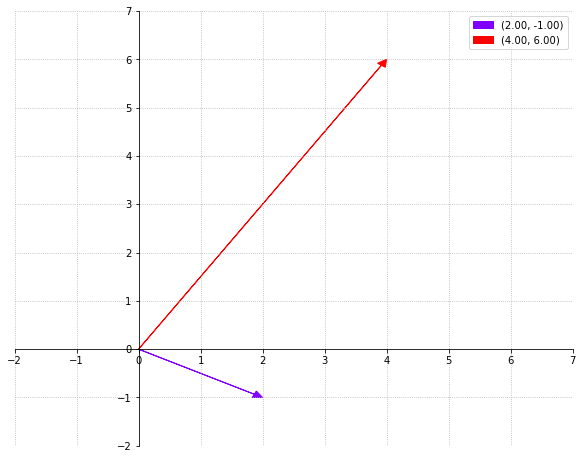

In [45]:
plot_vectors([x,b], lims=(-2,7))

### Quadratic form

In many finance applications we will often encounter expressions like

$$\mathbf{x'Ax}\tag{1}$$

where $\mathbf{A}$ is a symmetric matrix. This is referred to as a *quadratic form*.

The derivative of a quadratic form is

$$\frac{d}{d\mathbf{x}} \mathbf{x'Ax} = 2\mathbf{Ax}.$$

# Questions


1. Write out a $3\times 3$ matrix $\mathbf{A}$ and a $3\times 1$ vector $\mathbf{x}$. Calculate the quadratic form as in equation (1). Take the derivative of each of the three equations and confirm that $\frac{d}{d\mathbf{x}} \mathbf{x'Ax} = 2\mathbf{Ax}.$